In [1]:
import tensorflow as tf
from matplotlib import pylab as plt
from matplotlib import cm
import numpy as np
import pylab
import math
#outmers = file

In [94]:
from numpy.ma.core import default_fill_value
# Framework from https://towardsdatascience.com/chaos-game-representation-of-a-genetic-sequence-4681f1a67e14
# Code was not functional as copied, so I rewrote most of it and applied theory from FCGR papers to make calcs


infasta = '/content/drive/MyDrive/Abf1_sf_90_fps_with_sf_fimo.fasta'

def prep_fasta(fasta):
  
  ff = open(infasta) # A set of FASTA sequences, no size limit (whole genomes acceptable)
  rawfa = ff.read().splitlines()
  fastseq = []
  
  for line in rawfa:
    if not (">" in line):
      fastseq.append(str(line)) # Trims FASTA headers
  
  return fastseq

# Set up values to build the CGR for each sequence

def build_cgr(dnalist, k):
  # Converts a list of DNA sequence strings into their CGR representations
  # for k-mers of the given size
  
  cgrdict = {}
  
  for seq in dnalist:
    
    inseq = str(seq) # The input sequence string
    mls = [] # A list to capture all the kmers of the string
    kcgr = {} # A dictionary to record the points for each kmer
    
    for i in range(len(inseq) - k - 1):
      mer = inseq[i:i+k] # Report the kmers found in the input string
      mls.append(mer) # Record the kmers in a list
    
    for kseq in mls:
      
      maxval = 1 #int(math.sqrt(4**k))
      startval = maxval*0.5
      dval = startval*0.5
      px = startval
      py = startval

      for b in kseq:
        xa = ya = xc = yt = dval
        xg = yg = yc = xt = dval
        px, py = px, py
        if b == 'A':
          px -= xa
          py += ya
        elif b == 'C':
          px -= xc
          py -= yc
        elif b == 'G':
          px += xg
          py += yg
        elif b == 'T':
          px += xt
          py -= yt

        dval = dval/2 # Shorten the mappable area
        
      kcgr[kseq] = px, py
    
    #if not (seq in cgrdict): # Don't repeat FASTA entries; may be useful sometimes though, not sure
    cgrdict[seq] = kcgr
  
  return cgrdict


In [51]:
def map_cgr(seqdict):
  seqcgrs = {}
  for frag in seqdict.keys():
    kmcgr = seqdict[frag]
    cgrlist = []
    for kmer in kmcgr.keys():
      point = kmcgr[kmer]
      cgrlist.append(point)
    seqcgrs[frag] = cgrlist
  return seqcgrs




In [52]:

def fcgr_plt(cgrdict, binx, biny):
  mapdict = {}
  xlist = []
  ylist = []
  for cgrt in cgrdict.keys():
    pts = cgrdict[cgrt]
    for pt in pts:
      xc = pt[0]
      yc = pt[1]
      xlist.append(xc)
      ylist.append(yc)
    
    plt.rcParams["figure.figsize"] = [4, 4]
    plt.rcParams["figure.autolayout"] = False
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 2.5
    freqmap = plt.hist2d(xlist, ylist, bins = (binx, biny), cmap=cm.gray_r)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    mapdict[cgrt] = freqmap
  return mapdict
  

In [90]:
def fcgtensor(cgrdict, k, bins):
  tensdict = {}
  xlist = []
  ylist = []
  bins = bins
  for cgrt in cgrdict.keys():
    pts = cgrdict[cgrt]
    for pt in pts:
      xc = pt[0]
      yc = pt[1]
      xlist.append(xc)
      ylist.append(yc)
    
    tensmap, binx, biny = np.histogram2d(xlist, ylist, bins = (bins, bins))
    tensdict[cgrt] = tensmap
  return tensdict

dict_values([(array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]]), array([0.0625  , 0.171875, 0.28125 , 0.390625, 0.5     , 0.609375,
       0.71875 , 0.828125, 0.9375  ]), array([0.0625  , 0.171875, 0.28125 , 0.390625, 0.5     , 0.609375,
       0.71875 , 0.828125, 0.9375  ]), <matplotlib.collections.QuadMesh object at 0x7efba83ae510>), (array([[2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 0., 2., 2., 2., 1., 2., 1.],
       [1., 1., 0., 0., 2., 1., 0., 2.],
       [2., 1., 1., 1., 2., 2., 1., 1.],
       [1., 2., 2., 1., 2., 2., 1., 2.],
       [2., 0., 0., 1., 0., 0., 2., 1.],
       [2., 2., 2., 2., 1., 2., 2., 1.],
       [1., 1., 1., 2., 0., 0., 0., 0.]]), array([0.0625  , 0.171875, 0.28125 , 0.390625, 0.5  

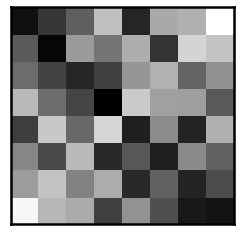

In [95]:
kv = 3
new_seq = prep_fasta(infasta)
cgrdict = build_cgr(new_seq, kv)
ptdict = map_cgr(cgrdict)
plts = fcgr_plt(ptdict, 8, 8)
print(plts.values())
#intens = fcgtensor(ptdict, kv, 8) # Returns a dictionary of sequences and their FCG representations
# Next task here is to associate cluster/classification from ML-based clustering of signal to each sequence
# This will define the classes of DNA sequence info we get from an experiment
# Pre-defined class annotations applied to FCGR representations should be sufficient for CNN processing
# The biggest point of concern currently is the number of observations:
# Using a pre-annotated dataset enables me to ask these questions: 
# is a CNN capable of discerning differences in DNA sequences purely based on the classifications we can make with unsupervised clustering of SF signal trajectories and LF patterning at a target site?

In [46]:
print(ptdict.values())

dict_values([[(-3.0, -1.0), (-1.0, 1.0), (1.0, 5.0), (7.0, -3.0), (1.0, -3.0), (5.0, -1.0), (-3.0, 3.0), (-3.0, 11.0), (-3.0, 9.0), (-1.0, 5.0), (3.0, -3.0), (9.0, -1.0), (5.0, 1.0), (-3.0, 5.0), (-3.0, -3.0), (-1.0, -3.0), (1.0, -1.0), (-1.0, 3.0), (1.0, 11.0), (7.0, 9.0), (3.0, 5.0), (9.0, -3.0), (5.0, -3.0), (-3.0, 1.0), (3.0, 7.0), (11.0, 3.0), (9.0, 9.0), (5.0, 5.0), (3.0, -1.0), (9.0, 3.0), (5.0, 11.0), (-1.0, 9.0), (3.0, 9.0), (9.0, 7.0), (9.0, 1.0), (5.0, 7.0), (-3.0, 7.0), (7.0, 1.0)], [(3.0, 1.0), (9.0, 7.0), (5.0, 1.0), (-3.0, 5.0), (-3.0, -3.0), (-3.0, -1.0), (-3.0, 3.0), (-3.0, 9.0), (-1.0, -3.0), (3.0, -3.0), (11.0, -3.0), (9.0, -1.0), (-1.0, 5.0), (9.0, -3.0), (7.0, -3.0), (11.0, -1.0), (11.0, 3.0), (9.0, 11.0), (7.0, 9.0), (1.0, 5.0), (7.0, 3.0), (1.0, 11.0), (7.0, 11.0), (1.0, 7.0), (5.0, 3.0), (-3.0, 7.0), (-1.0, 3.0), (5.0, 11.0), (-3.0, 11.0), (-1.0, 11.0), (3.0, 11.0), (3.0, 7.0), (9.0, 3.0), (5.0, 9.0), (-1.0, 9.0), (5.0, -1.0), (-1.0, 1.0), (3.0, 5.0), (9.0, 1.0)

In [86]:
print(intens.values())

dict_values([array([[1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1.]]), array([[2., 0., 2., 0., 2., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 1., 0., 2., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 2., 0., 2., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 2., 0., 2., 0., 2.]]), array([[3., 0., 3., 0., 3., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 2., 0., 3., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 3., 0., 3., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 3., 0., 3., 0., 3.]]), array([[4., 0., 4., 0., 4., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 3., 0., 4., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 4., 0., 4., 0., 4.],
       [0., 0., 0.,

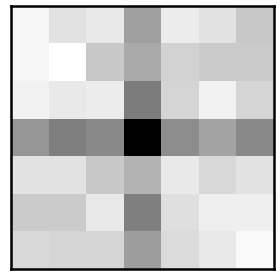

In [84]:
fpt1 = intens['GGTGTGTTTGTTCATATCACGGCATACGTTAACACAATGTAAATCTTGCTTTGGGTTGACTGAGGGAAATAACTATAGACATCACACCAA']
fpt2 = intens['TACTCAAGACCCGTGCAGATCACTATTACACTCATTATTACAAGTCATTGAGAACGAAATTTTGACATCATTACTAATAATGTTACTCAT']

fpk = ptdict.keys()
fpt = list(ptdict.values())
plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.5

pt1 = pylab.imshow(fpt1, cmap=cm.gray_r)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)



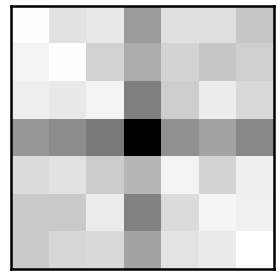

In [75]:
pt2 = pylab.imshow(fpt2, cmap=cm.gray_r)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


In [43]:
input_shape = (1, 8, 8, 2)
cvl = tf.keras.layers.Conv2D(2, 2, input_shape=input_shape[1:])(fpt)
print(cvl.shape)

TypeError: ignored